In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('dengue_features_train (1).csv')

In [3]:
df2 = pd.read_csv('dengue_labels_train.csv')

In [4]:
df.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [5]:
df['total_cases'] = df2['total_cases']

In [6]:
df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

### Analyze the trend of number of cases over the weeks over the years
 We will plot the features over the same X axis

In [7]:
df['weekofyear'].value_counts().sort_values(ascending=True)

53     5
52    23
40    28
42    28
20    28
21    28
22    28
23    28
24    28
25    28
26    28
27    28
28    28
29    28
43    28
31    28
32    28
33    28
34    28
35    28
36    28
37    28
38    28
39    28
41    28
30    28
18    28
17    28
19    28
46    28
47    28
48    28
49    28
50    28
51    28
1     28
2     28
3     28
4     28
5     28
6     28
7     28
8     28
9     28
10    28
11    28
12    28
13    28
14    28
15    28
16    28
45    28
44    28
Name: weekofyear, dtype: int64

### Univariate analysis

(array([733., 425., 200.,  57.,  16.,   7.,   2.,   1.,   0.,   2.]),
 array([  0.  ,  39.06,  78.12, 117.18, 156.24, 195.3 , 234.36, 273.42,
        312.48, 351.54, 390.6 ]),
 <BarContainer object of 10 artists>)

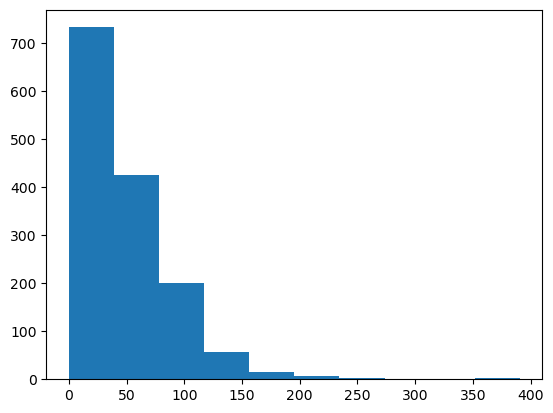

In [8]:
# precipitation hist
plt.hist(df.precipitation_amt_mm)

(array([  3.,  19.,  65., 214., 292., 281., 316., 217.,  33.,   6.]),
 array([294.89285714, 295.69642857, 296.5       , 297.30357143,
        298.10714286, 298.91071429, 299.71428571, 300.51785714,
        301.32142857, 302.125     , 302.92857143]),
 <BarContainer object of 10 artists>)

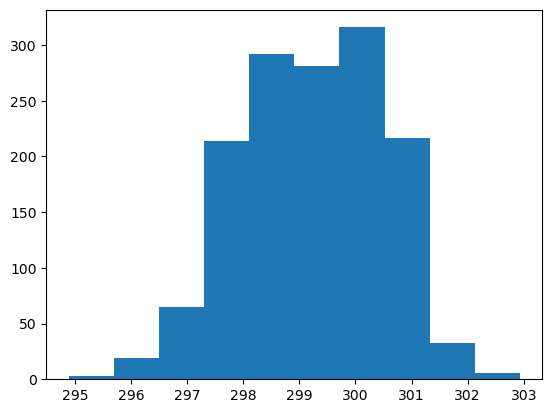

In [9]:
plt.hist(df.reanalysis_avg_temp_k)

(array([  5.,  15.,  40.,  98., 191., 180., 241., 430., 232.,  14.]),
 array([289.64285714, 290.52357143, 291.40428571, 292.285     ,
        293.16571429, 294.04642857, 294.92714286, 295.80785714,
        296.68857143, 297.56928571, 298.45      ]),
 <BarContainer object of 10 artists>)

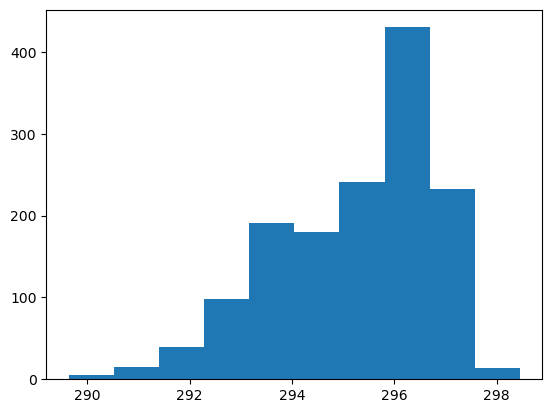

In [10]:
plt.hist(df.reanalysis_dew_point_temp_k)

(array([1.136e+03, 2.290e+02, 4.900e+01, 2.300e+01, 5.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0.  ,  57.05, 114.1 , 171.15, 228.2 , 285.25, 342.3 , 399.35,
        456.4 , 513.45, 570.5 ]),
 <BarContainer object of 10 artists>)

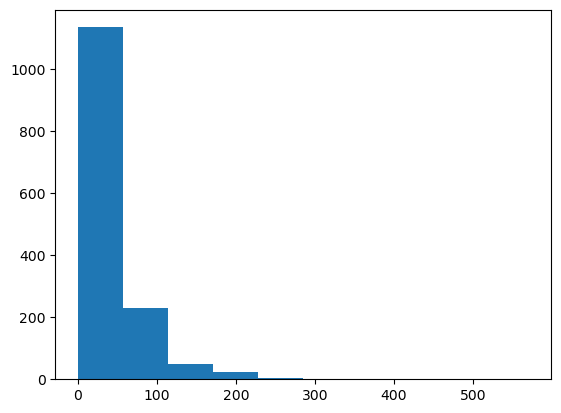

In [11]:
plt.hist(df.reanalysis_precip_amt_kg_per_m2)

(array([1266.,  132.,   26.,   12.,    5.,    3.,    2.,    5.,    3.,
           2.]),
 array([  0. ,  46.1,  92.2, 138.3, 184.4, 230.5, 276.6, 322.7, 368.8,
        414.9, 461. ]),
 <BarContainer object of 10 artists>)

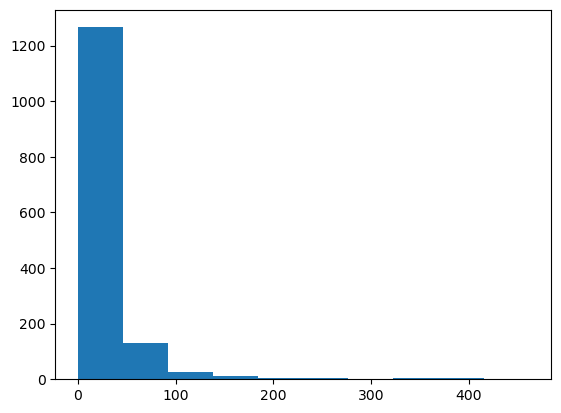

In [12]:
plt.hist(df.total_cases)

In [13]:
df['city'].value_counts()

sj    936
iq    520
Name: city, dtype: int64

In [14]:
data = df.groupby(by='weekofyear', as_index=False).mean()

<BarContainer object of 53 artists>

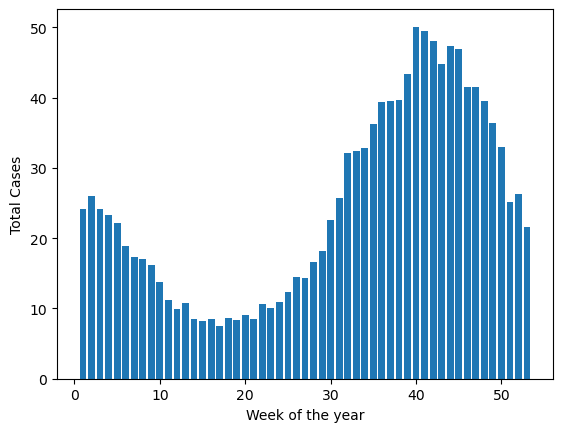

In [33]:
plt.xlabel("Week of the year")
plt.ylabel("Total Cases")
plt.bar(data['weekofyear'], data['total_cases'])

In [16]:
peru = df[df['city'] == 'iq'].groupby(by=['weekofyear'], as_index=False).mean()
rico = df[df['city'] == 'sj'].groupby(by='weekofyear', as_index=False).mean()

<BarContainer object of 53 artists>

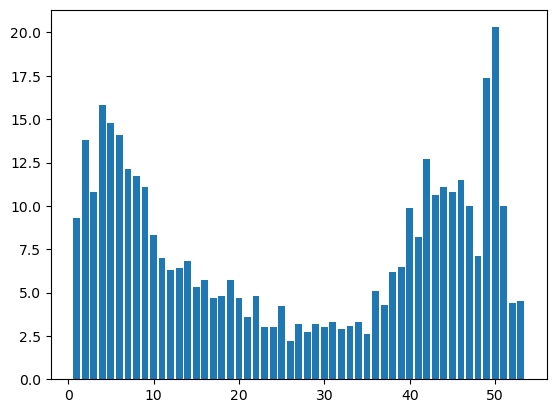

In [17]:
plt.bar(peru['weekofyear'], peru['total_cases'])

<BarContainer object of 53 artists>

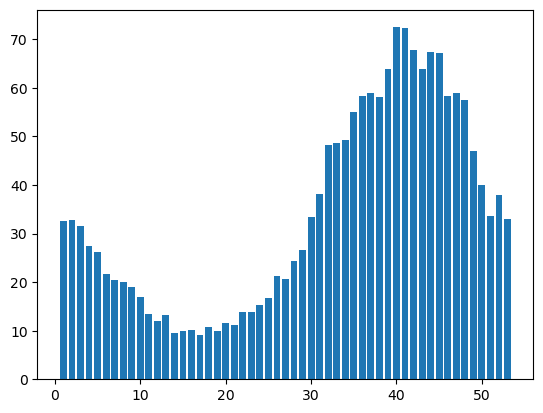

In [18]:
plt.bar(rico['weekofyear'], rico['total_cases'])

### Line plots with cities as hue

In [19]:
data_city = df.groupby(by=['weekofyear', 'city'], as_index=False).mean()

<AxesSubplot:xlabel='weekofyear', ylabel='total_cases'>

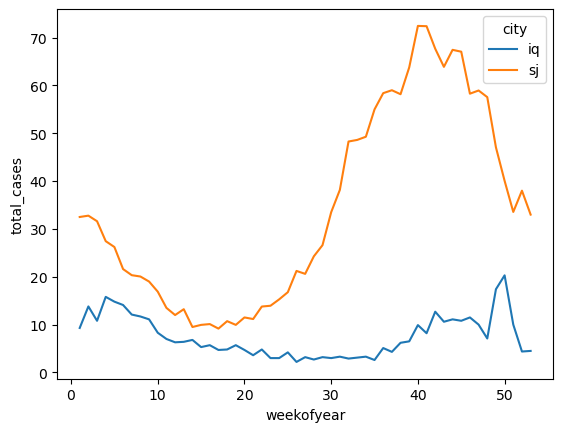

In [20]:
sns.lineplot(data=data_city, x='weekofyear', y='total_cases', hue='city')

<AxesSubplot:xlabel='weekofyear', ylabel='total_cases'>

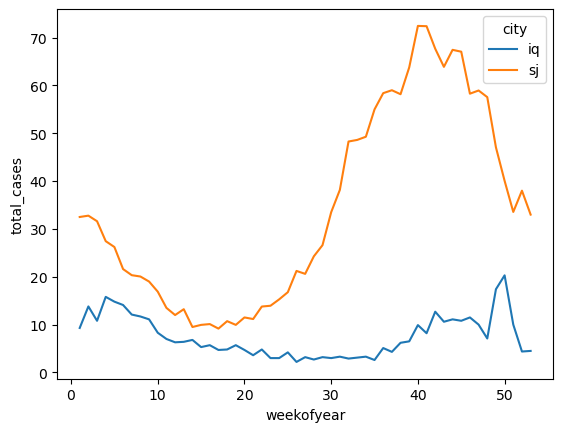

In [21]:
sns.lineplot(data=data_city, x='weekofyear', y='total_cases', hue='city')

<AxesSubplot:>

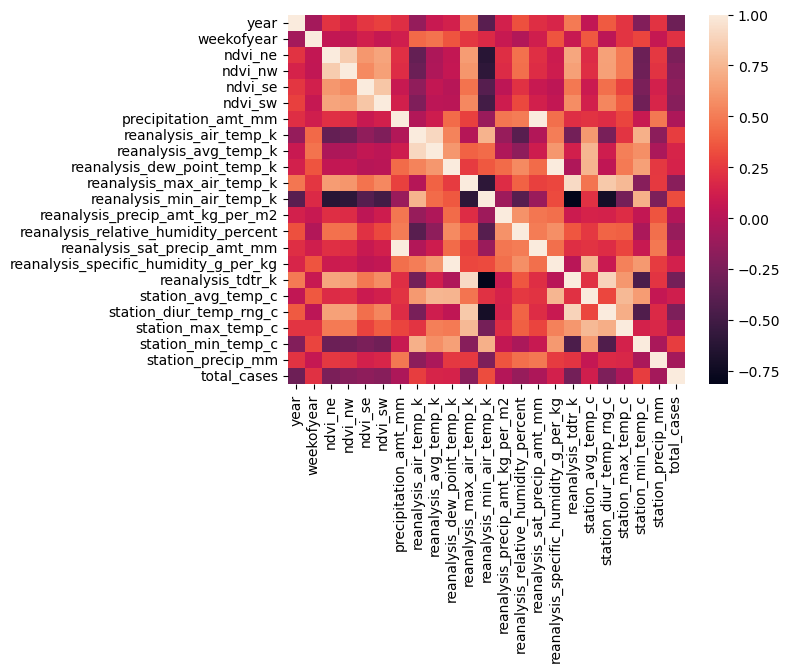

In [22]:
sns.heatmap(df.corr())

In [23]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    #au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    au_corr.loc[:,:] = np.tril(au_corr.values, k=-1)
    cor = cor[cor>0]
    return au_corr[0:n]

In [24]:
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)


In [25]:
print(so[25:])

reanalysis_specific_humidity_g_per_kg  reanalysis_dew_point_temp_k              0.997051
reanalysis_dew_point_temp_k            reanalysis_specific_humidity_g_per_kg    0.997051
reanalysis_tdtr_k                      reanalysis_max_air_temp_k                0.918578
reanalysis_max_air_temp_k              reanalysis_tdtr_k                        0.918578
reanalysis_air_temp_k                  reanalysis_avg_temp_k                    0.901777
reanalysis_avg_temp_k                  reanalysis_air_temp_k                    0.901777
reanalysis_tdtr_k                      station_diur_temp_rng_c                  0.881176
station_diur_temp_rng_c                reanalysis_tdtr_k                        0.881176
ndvi_ne                                ndvi_nw                                  0.850902
ndvi_nw                                ndvi_ne                                  0.850902
reanalysis_max_air_temp_k              station_diur_temp_rng_c                  0.834263
station_diur_temp_rng

In [26]:
df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [27]:
# dropping dew point, diur_temp
df = df.drop(['reanalysis_dew_point_temp_k'], axis=1)

# diur_temp
df = df.drop(['station_diur_temp_rng_c', 'station_precip_mm', 'precipitation_amt_mm'], axis=1)

# remove station values
df = df.drop(['station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c'], axis=1)

# remove avg temp
df = df.drop('reanalysis_avg_temp_k', axis=1)

# remove reanalysis_precip_amt_kg_per_m2
df = df.drop('reanalysis_precip_amt_kg_per_m2', axis=1)

In [28]:
df = df.drop(df[(df['ndvi_se'].isnull())].index)

In [29]:
df['avg_ndvi'] = 0

In [30]:
for i in range(df.shape[0]):
    if not(math.isnan(df.iloc[i, 4])) and not(math.isnan(df.iloc[i, 5])):
        df.iloc[i,16] = (df.iloc[i, 4] + df.iloc[i, 5] + df.iloc[i, 6] + df.iloc[i, 7])/4
    elif math.isnan(df.iloc[i, 4]) and math.isnan(df.iloc[i, 5]):
        df.iloc[i,16] = (df.iloc[i, 6] + df.iloc[i, 7])/2
    elif math.isnan(df.iloc[i, 4]) and not(math.isnan(df.iloc[i, 5])):
        df.iloc[i,16] = (df.iloc[i, 5] + df.iloc[i, 6] + df.iloc[i, 7])/3
    else:
        df.iloc[i,16] = (df.iloc[i, 4] + df.iloc[i, 6] + df.iloc[i, 7])/3

In [31]:
# drop ndvis
df = df.drop(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw'], axis = 1)

### Bivariate

In [32]:
sns.scatterplot(data=data_city, x='avg_ndvi', y='total_cases', hue='city')

ValueError: Could not interpret value `avg_ndvi` for parameter `x`

In [ ]:
data_year = df.groupby(by=['year', 'city'], as_index=False).mean()

In [ ]:
sns.scatterplot(data=df[df['city'] == 'sj'], x='reanalysis_specific_humidity_g_per_kg', y='total_cases')

In [ ]:
sns.scatterplot(data=df[df['city'] == 'iq'], x='reanalysis_air_temp_k', y='total_cases')

In [ ]:
sns.scatterplot(data=df[df['city'] == 'sj'], x='reanalysis_sat_precip_amt_mm', y='total_cases', hue='weekofyear')

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
sns.scatterplot(data=df, x='dist_from_monsoon', y='total_cases', hue='city')

In [ ]:
df['month'] = 0
for i in range(df.shape[0]):
    
    df.iloc[i,13] = df.iloc[i, 3].split('-')[1]
df['dist_from_monsoon'] = ''

In [ ]:
#binning weeks into months
for i in range(df.shape[0]):
    if df.iloc[i, 0] == 'iq':
        df.iloc[i, 14] = abs(df.iloc[i, 2] - 10)
    else:
        df.iloc[i, 14] = abs(df.iloc[i, 2] - 42)
df2 = df.drop(['weekofyear', 'week_start_date'], axis=1)

In [ ]:
factor_cols = df2[['city', 'month', 'year']]
dummies = pd.get_dummies(factor_cols, drop_first=True)
df2 = df2.drop(['city', 'month', 'year'], axis=1)
df2 = pd.concat([df2, dummies], axis=1)

In [ ]:
# scale our data
columns_scaling = ['reanalysis_air_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_relative_humidity_percent', 'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'dist_from_monsoon']
scaler = StandardScaler()
df3 = scaler.fit_transform(df2[columns_scaling])

In [ ]:
df3 = pd.DataFrame(data=df3, columns=columns_scaling)

In [ ]:
df4 = pd.concat([df3, df2[['total_cases', 'avg_ndvi', 'city_sj', 'month_02', 'month_03', 'month_04', 'month_05', 'month_06', 'month_07', 'month_08', 'month_09', 'month_10', 'month_11', 'month_12', 'year']]], axis=1)

df4 = df4.dropna()

In [ ]:
df4 = df4.drop(['month_02', 'month_03', 'month_04', 'month_05', 'month_06', 'month_07', 'month_08', 'month_09', 'month_10', 'month_11', 'month_12', 'avg_ndvi', 'city_sj', 'reanalysis_tdtr_k', 'reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_min_air_temp_k', 'reanalysis_sat_precip_amt_mm'], axis=1)


In [ ]:
df4.head()

In [ ]:
#RF

avg = 0
X = df4.drop(['total_cases'], axis=1)
y = df4['total_cases']
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

    rf = RandomForestRegressor(n_estimators=220, min_samples_split=5)
    rf.fit(X_train, y_train)

    preds = rf.predict(X_test)

    avg += mean_absolute_error(y_test, (preds).astype(int))

avg/10

In [ ]:
#XG Boost

avg = 0
X = df4.drop(['total_cases'], axis=1)
y = df4['total_cases']
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

    rf = GradientBoostingRegressor(n_estimators=220, min_samples_split=5)
    rf.fit(X_train, y_train)

    preds = rf.predict(X_test)

    avg += mean_absolute_error(y_test, (preds).astype(int))

avg/10

In [ ]:
#ADA Boosting

avg = 0
X = df4.drop(['total_cases'], axis=1)
y = df4['total_cases']
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

    rf = AdaBoostRegressor()
    rf.fit(X_train, y_train)

    preds = rf.predict(X_test)

    avg += mean_absolute_error(y_test, (preds).astype(int))

avg/10

In [ ]:
#SVR

avg = 0
X = df4.drop(['total_cases'], axis=1)
y = df4['total_cases']
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

    rf = SVR()
    rf.fit(X_train, y_train)

    preds = rf.predict(X_test)

    avg += mean_absolute_error(y_test, (preds).astype(int))

avg/10

In [ ]:
#Poisson Regressor

avg = 0
X = df4.drop(['total_cases'], axis=1)
y = df4['total_cases']
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

    rf = PoissonRegressor()
    rf.fit(X_train, y_train)

    preds = rf.predict(X_test)

    avg += mean_absolute_error(y_test, (preds).astype(int))

avg/10

In [ ]:
#Linear Regressor

avg = 0
X = df4.drop(['total_cases'], axis=1)
y = df4['total_cases']
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

    rf = LinearRegression()
    rf.fit(X_train, y_train)

    preds = rf.predict(X_test)

    avg += mean_absolute_error(y_test, (preds).astype(int))

avg/10

In [ ]:
df_test.head()

In [ ]:
# Test Data
df_test = pd.read_csv('mod_test_dat.csv')
df_test = df_test.drop('Unnamed: 0', axis=1)
preds = rf.predict(df_test)
preds = (preds).astype(int)

In [ ]:
test_original = pd.read_csv('dengue_features_test.csv')
test_original = test_original[['city', 'year', 'weekofyear']]
test_original['total_cases'] = preds

In [ ]:
test_original.head()

In [ ]:
test_original.to_csv('Sub1.csv', index=False)

In [ ]:
# Lasso

avg = 0
X = df4.drop(['total_cases'], axis=1)
y = df4['total_cases']
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

    rf = Lasso(alpha=0.001)
    rf.fit(X_train, y_train)

    preds = rf.predict(X_test)

    avg += mean_absolute_error(y_test, (preds).astype(int))

avg/10

In [ ]:
#SVR

avg = 0
X = df4.drop(['total_cases'], axis=1)
y = df4['total_cases']
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

    rf = SVR(kernel='poly')
    rf.fit(X_train, y_train)

    preds = rf.predict(X_test)

    avg += mean_absolute_error(y_test, (preds).astype(int))

avg/10

In [ ]:
#Gradient Boosting

avg = 0
X = df4.drop(['total_cases'], axis=1)
y = df4['total_cases']
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

    rf = GradientBoostingRegressor(loss='absolute_error', n_estimators=250, criterion='squared_error', min_samples_split=5)
    rf.fit(X_train, y_train)

    preds = rf.predict(X_test)

    avg += mean_absolute_error(y_test, (preds).astype(int))

avg/10

In [ ]:
# Fucking LM

avg = 0
X = df4.drop(['total_cases'], axis=1)
y = df4['total_cases']
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

    rf = LinearRegression()
    rf.fit(X_train, y_train)

    preds = rf.predict(X_test)

    avg += mean_absolute_error(y_test, (preds).astype(int))

avg/10

In [ ]:
sns.scatterplot(data=df4, x='dist_from_monsoon', y='reanalysis_air_temp_k', hue='year')

In [ ]:
X = df4.drop(['total_cases'], axis=1)
y = df4['total_cases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

rf = RandomForestRegressor(n_estimators=200)
rf.fit(X_train, y_train)

preds = rf.predict(X_test)

mean_absolute_error(y_test, (preds).astype(int))

In [ ]:
from sklearn.model_selection import cross_val_score
rf = RandomForestRegressor(n_estimators=200)

In [ ]:
sns.histplot(data=df4[(df4['year'] == 2004.0)], x='total_cases')

### Testing data manipulation

In [ ]:
test_data = pd.read_csv('dengue_features_test.csv')

In [ ]:
test_data.head()

In [ ]:
# dropping dew point, diur_temp
test_data = test_data.drop(['reanalysis_dew_point_temp_k'], axis=1)

# diur_temp
test_data = test_data.drop(['station_diur_temp_rng_c', 'station_precip_mm', 'precipitation_amt_mm'], axis=1)

# remove station values
test_data = test_data.drop(['station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c'], axis=1)

# remove avg temp
test_data = test_data.drop('reanalysis_avg_temp_k', axis=1)

# remove reanalysis_precip_amt_kg_per_m2
test_data = test_data.drop('reanalysis_precip_amt_kg_per_m2', axis=1)

In [ ]:
test_data['reanalysis_tdtr_k'].fillna(test_data['reanalysis_tdtr_k'].mean(), inplace=True)
test_data['reanalysis_specific_humidity_g_per_kg'].fillna(test_data['reanalysis_specific_humidity_g_per_kg'].mean(), inplace=True)
test_data['reanalysis_sat_precip_amt_mm'].fillna(test_data['reanalysis_sat_precip_amt_mm'].mean(), inplace=True)
test_data['reanalysis_relative_humidity_percent'].fillna(test_data['reanalysis_relative_humidity_percent'].mean(), inplace=True)
test_data['reanalysis_min_air_temp_k'].fillna(test_data['reanalysis_min_air_temp_k'].mean(), inplace=True)
test_data['reanalysis_max_air_temp_k'].fillna(test_data['reanalysis_max_air_temp_k'].mean(), inplace=True)
test_data['reanalysis_air_temp_k'].fillna(test_data['reanalysis_air_temp_k'].mean(), inplace=True)
test_data['ndvi_sw'].fillna(test_data['ndvi_sw'].mean(), inplace=True)
test_data['ndvi_se'].fillna(test_data['ndvi_se'].mean(), inplace=True)

In [ ]:
test_data['avg_ndvi'] = 0

In [ ]:
for i in range(test_data.shape[0]):
    if not(math.isnan(test_data.iloc[i, 4])) and not(math.isnan(df.iloc[i, 5])):
        test_data.iloc[i,15] = (test_data.iloc[i, 4] + test_data.iloc[i, 5] + test_data.iloc[i, 6] + test_data.iloc[i, 7])/4
    elif math.isnan(test_data.iloc[i, 4]) and math.isnan(test_data.iloc[i, 5]):
        test_data.iloc[i,15] = (test_data.iloc[i, 6] + test_data.iloc[i, 7])/2
    elif math.isnan(test_data.iloc[i, 4]) and not(math.isnan(test_data.iloc[i, 5])):
        test_data.iloc[i,15] = (test_data.iloc[i, 5] + test_data.iloc[i, 6] + test_data.iloc[i, 7])/3
    else:
        test_data.iloc[i,15] = (test_data.iloc[i, 4] + test_data.iloc[i, 6] + test_data.iloc[i, 7])/3

In [ ]:
test_data.head()

In [ ]:
test_data.isnull().sum()

In [ ]:
test2.head()

In [ ]:
test_data['month'] = 0

In [ ]:
#binning weeks into months

for i in range(test_data.shape[0]):
    
    test_data.iloc[i,15] = test_data.iloc[i, 3].split('-')[1]
test2 = test_data.drop(['weekofyear', 'week_start_date'], axis=1)

In [ ]:
factor_cols = test2[['city', 'month', 'year']]
dummies = pd.get_dummies(factor_cols, drop_first=True)
test2 = test2.drop(['city', 'month', 'year'], axis=1)
test2 = pd.concat([test2, dummies], axis=1)